In [1]:
import numpy as num
import pandas as pd

In [2]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
df= pd.read_csv('WIPRO.csv')
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1991-01-25    0.400000    0.400000    0.350000    0.350000    0.045882   
1     1991-01-28         NaN         NaN         NaN         NaN         NaN   
2     1991-01-29         NaN         NaN         NaN         NaN         NaN   
3     1991-01-30         NaN         NaN         NaN         NaN         NaN   
4     1991-01-31    0.375000    0.383330    0.375000    0.383330    0.050251   
...          ...         ...         ...         ...         ...         ...   
6880  2018-02-14  287.899994  296.700012  287.899994  293.000000  293.000000   
6881  2018-02-15  294.000000  295.100006  290.700012  291.549988  291.549988   
6882  2018-02-16  294.399994  295.649994  289.850006  290.700012  290.700012   
6883  2018-02-19  292.600006  294.549988  288.649994  290.049988  290.049988   
6884  2018-02-20  288.549988  292.850006  288.549988  291.350006  291.350006   

        Volume  
0          0.0  
1    

In [4]:
df.shape
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6.060000e+03
mean,282.190532,284.132525,128.529955,130.511846,101.970192,1.977338e+06
std,11699.993922,11700.696837,96.504840,97.528607,93.976138,4.186646e+06
min,0.308330,0.329170,0.308330,0.316670,-0.120943,0.000000e+00
25%,47.474901,48.474901,46.296776,47.196149,19.382424,1.323750e+05
50%,126.000000,129.000000,121.154999,124.199997,74.280834,4.148410e+05
75%,211.281254,214.188748,206.447495,209.096249,168.599067,1.426366e+06
max,910897.000000,910953.000000,493.123993,493.123993,330.821350,4.327439e+07


In [5]:
df.head()
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     1991-01-25    0.400000    0.400000    0.350000    0.350000    0.045882   
1     1991-01-28         NaN         NaN         NaN         NaN         NaN   
2     1991-01-29         NaN         NaN         NaN         NaN         NaN   
3     1991-01-30         NaN         NaN         NaN         NaN         NaN   
4     1991-01-31    0.375000    0.383330    0.375000    0.383330    0.050251   
...          ...         ...         ...         ...         ...         ...   
6880  2018-02-14  287.899994  296.700012  287.899994  293.000000  293.000000   
6881  2018-02-15  294.000000  295.100006  290.700012  291.549988  291.549988   
6882  2018-02-16  294.399994  295.649994  289.850006  290.700012  290.700012   
6883  2018-02-19  292.600006  294.549988  288.649994  290.049988  290.049988   
6884  2018-02-20  288.549988  292.850006  288.549988  291.350006  291.350006   

       

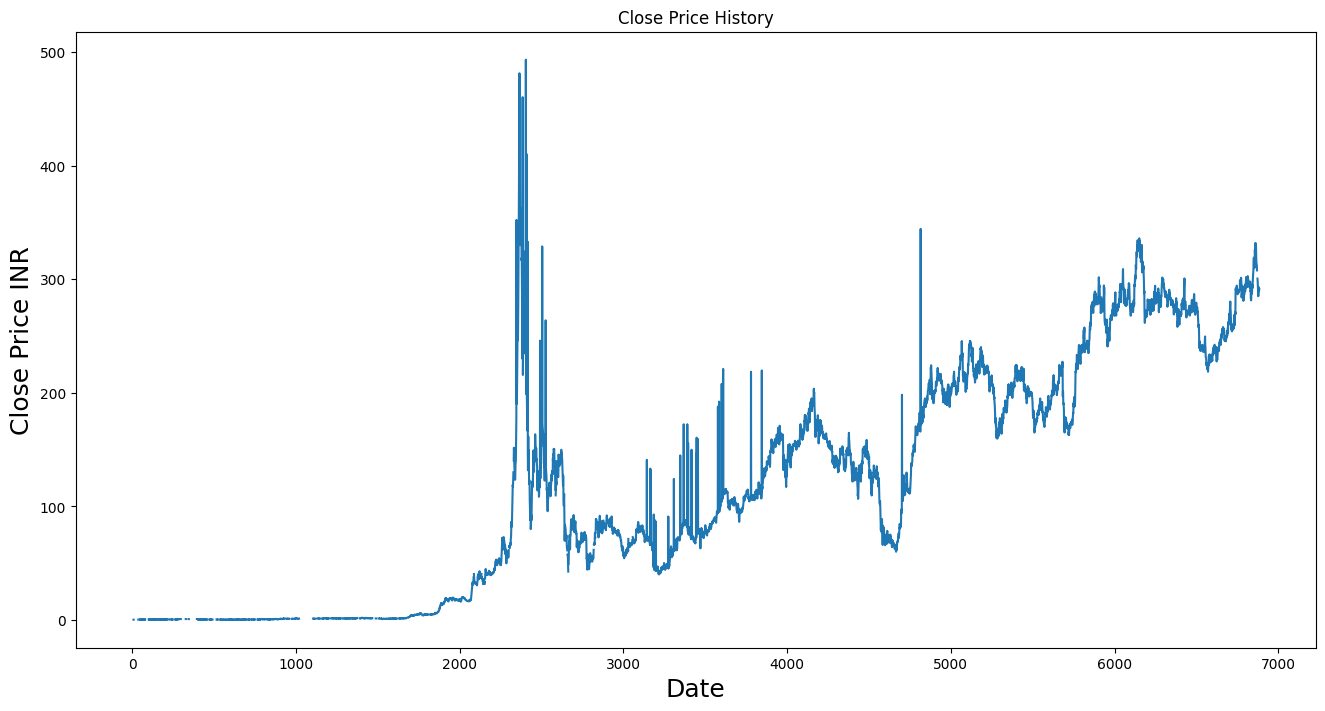

In [6]:

import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()


In [7]:
df.isnull().sum()

Date           0
Open         825
High         825
Low          825
Close        825
Adj Close    825
Volume       825
dtype: int64

<ipython-input-8-77fbfd57c9fe>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-8-77fbfd57c9fe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-8-77fbfd57c9fe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new f

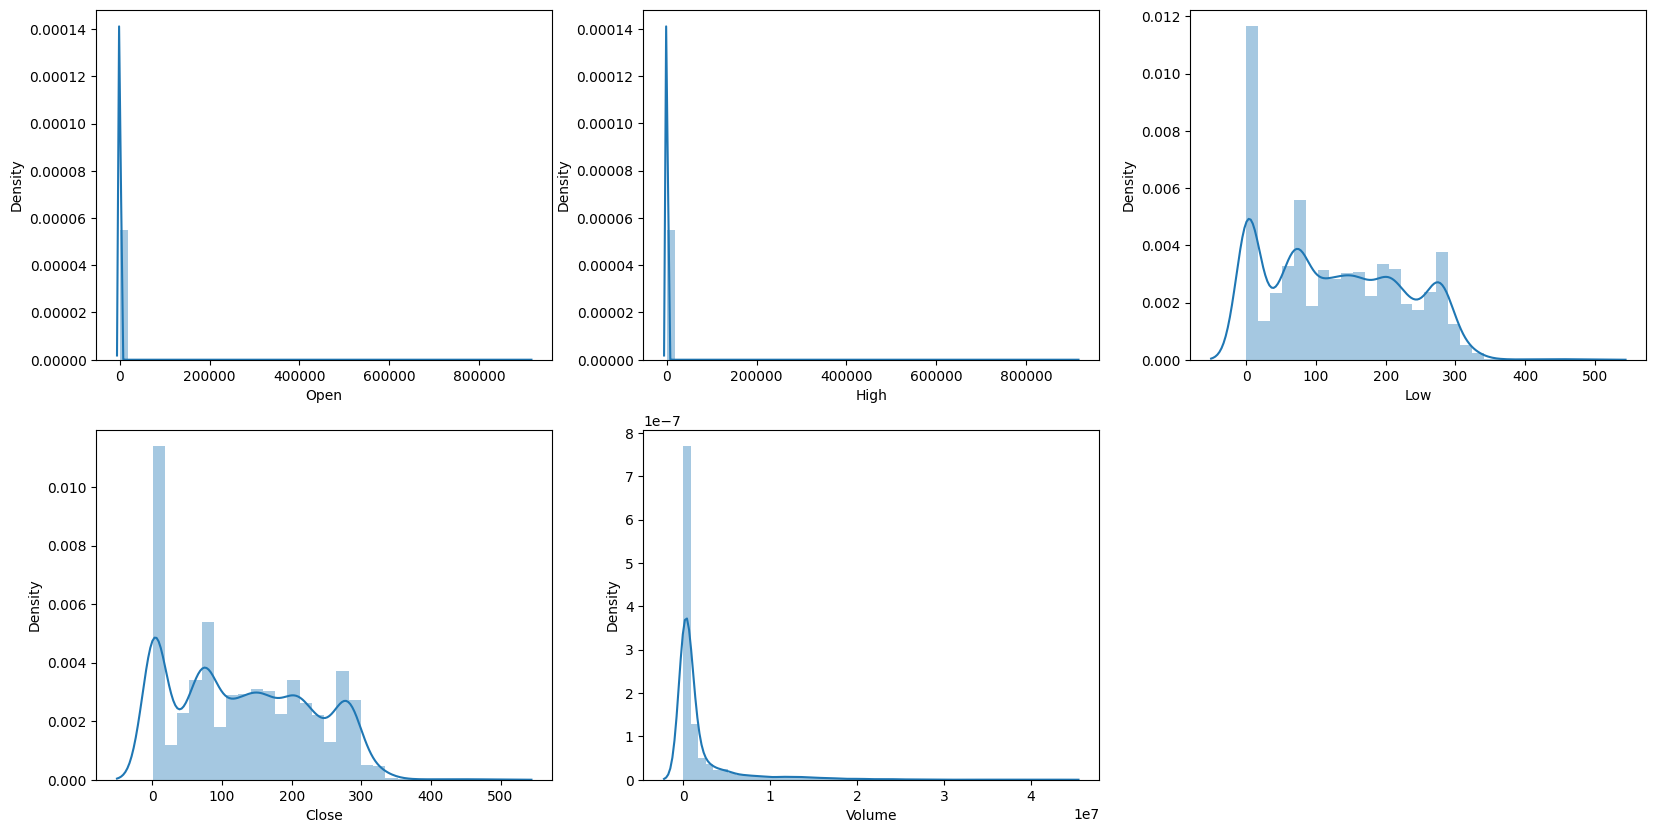

In [8]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

<ipython-input-9-273e95aba42b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


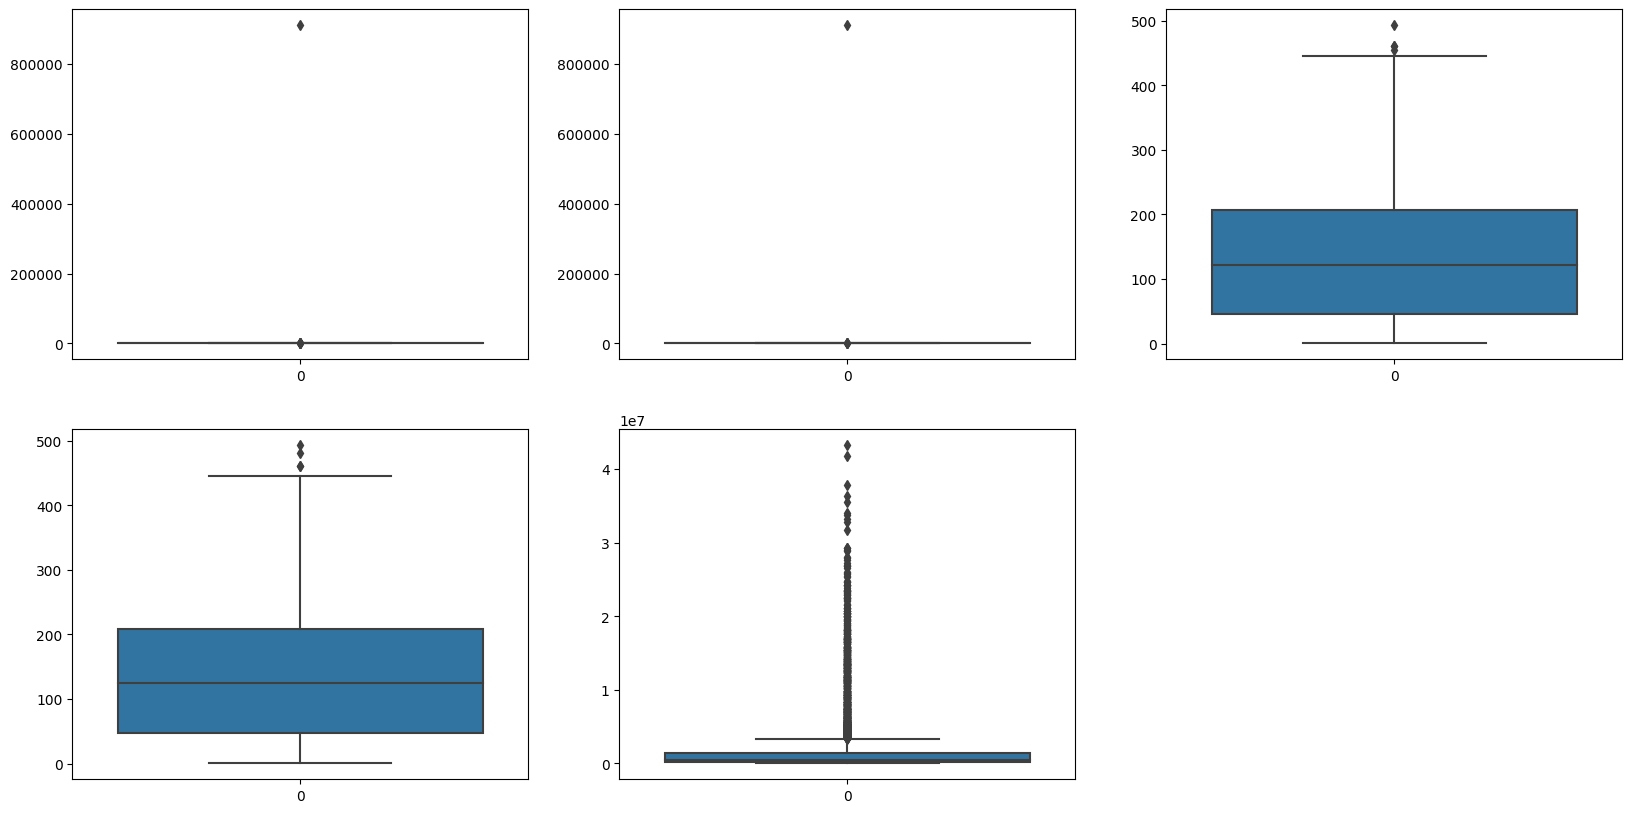

In [9]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6885 non-null   object 
 1   Open       6060 non-null   float64
 2   High       6060 non-null   float64
 3   Low        6060 non-null   float64
 4   Close      6060 non-null   float64
 5   Adj Close  6060 non-null   float64
 6   Volume     6060 non-null   float64
dtypes: float64(6), object(1)
memory usage: 376.6+ KB


In [11]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month']=splitted[1].astype('int')
df['year']=splitted[0].astype('int')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,1991-01-25,0.400,0.40000,0.350,0.35000,0.045882,0.0,25,1,1991
1,1991-01-28,NaN,NaN,NaN,NaN,NaN,NaN,28,1,1991
2,1991-01-29,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1991
3,1991-01-30,NaN,NaN,NaN,NaN,NaN,NaN,30,1,1991
4,1991-01-31,0.375,0.38333,0.375,0.38333,0.050251,0.0,31,1,1991


In [12]:
df['is_quarter_end'] = num.where(df['month']%3==0,1,0)



<ipython-input-13-3ff56352de2d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
<ipython-input-13-3ff56352de2d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


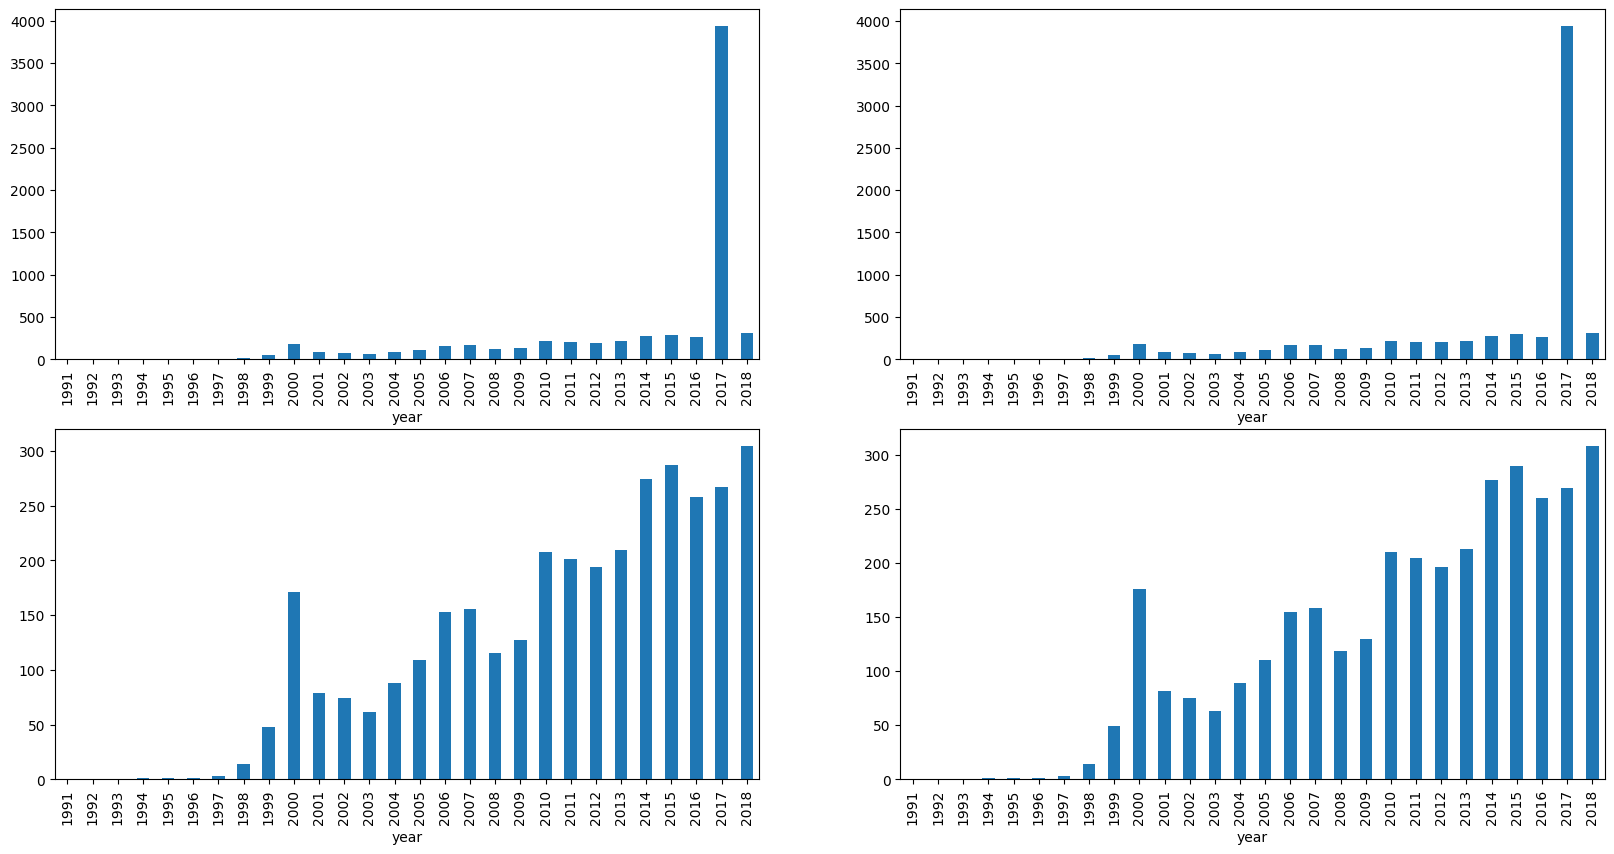

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
df.groupby('is_quarter_end').mean()

<ipython-input-14-8b310a02a10a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,131.454426,133.379704,127.970731,129.971272,101.639779,1.939657e+06,15.774765,5.999781,2003.948611
1,580.550200,582.525276,129.636857,131.581830,102.624195,2.051922e+06,15.713668,7.503893,2003.867215


In [15]:

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = num.where(df['Close'].shift(-1) > df['Close'], 1, 0)

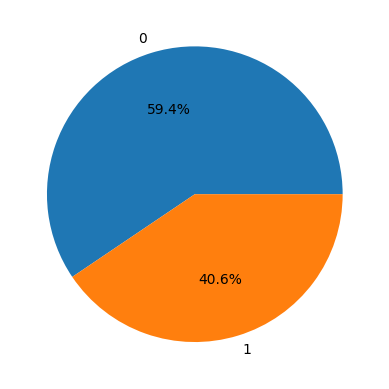

In [16]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1,], autopct='%1.1f%%')
plt.show()

<ipython-input-17-b77f1df7f533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)


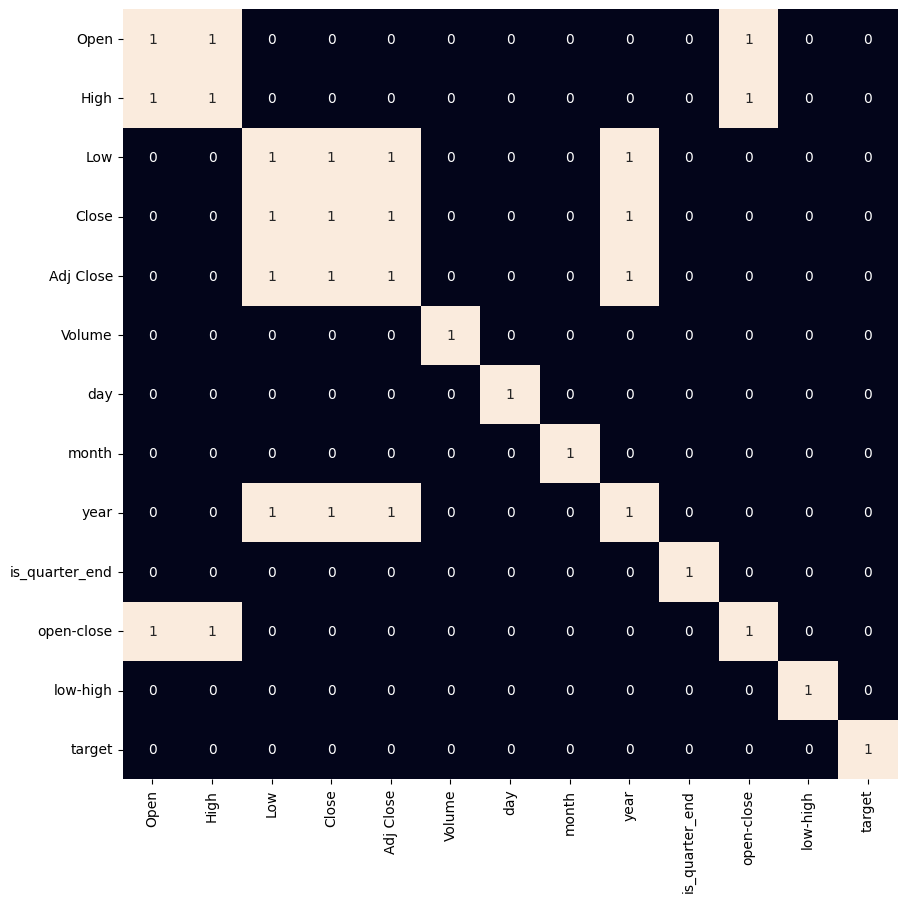

In [17]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [18]:

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(6196, 3) (689, 3)


In [25]:
df.dropna(inplace=True)
df.dropna()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,1991-01-25,0.400000,0.400000,0.350000,0.350000,0.045882,0.0,25,1,1991,0,0.050000,-0.050000,0
4,1991-01-31,0.375000,0.383330,0.375000,0.383330,0.050251,0.0,31,1,1991,0,-0.008330,-0.008330,0
9,1991-02-07,0.375000,0.375000,0.375000,0.375000,0.049159,0.0,7,2,1991,0,0.000000,0.000000,0
10,1991-02-08,0.375000,0.375000,0.375000,0.375000,0.049159,0.0,8,2,1991,0,0.000000,0.000000,0
15,1991-02-15,0.366670,0.366670,0.366670,0.366670,0.048067,0.0,15,2,1991,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,2018-02-14,287.899994,296.700012,287.899994,293.000000,293.000000,129732.0,14,2,2018,0,-5.100006,-8.800018,0
6881,2018-02-15,294.000000,295.100006,290.700012,291.549988,291.549988,71678.0,15,2,2018,0,2.450012,-4.399994,0
6882,2018-02-16,294.399994,295.649994,289.850006,290.700012,290.700012,542262.0,16,2,2018,0,3.699982,-5.799988,0
6883,2018-02-19,292.600006,294.549988,288.649994,290.049988,290.049988,264422.0,19,2,2018,0,2.550018,-5.899994,1


In [30]:
Y_train_no_nan = drop_missing_values(X_train, Y_train)
X_valid_no_nan, Y_valid_no_nan = drop_missing_values(X_valid, Y_valid)

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
def drop_missing_values(X, y):
    nan_rows = num.any(num.isnan(X), axis=1)
    X_no_nan = X[~nan_rows]
    y_no_nan = y[~nan_rows]
    return X_no_nan, y_no_nan

X_train_no_nan,
for i in range(3):
    # Fit the model using data without missing values
    models[i].fit(X_train_no_nan, Y_train_no_nan)

    print(f'Model {i+1}:')
    print('Training Accuracy:', metrics.roc_auc_score(Y_train_no_nan, models[i].predict_proba(X_train_no_nan)[:, 1]))
    print('Validation Accuracy:', metrics.roc_auc_score(Y_valid_no_nan, models[i].predict_proba(X_valid_no_nan)[:, 1]))
    print()


Model 1:
Training Accuracy: 0.5023257831103232
Validation Accuracy: 0.5046071251107223

Model 2:
Training Accuracy: 0.42883247341294206
Validation Accuracy: 0.4459081383541815

Model 3:
Training Accuracy: 0.864296091800737
Validation Accuracy: 0.5409996327262514



In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


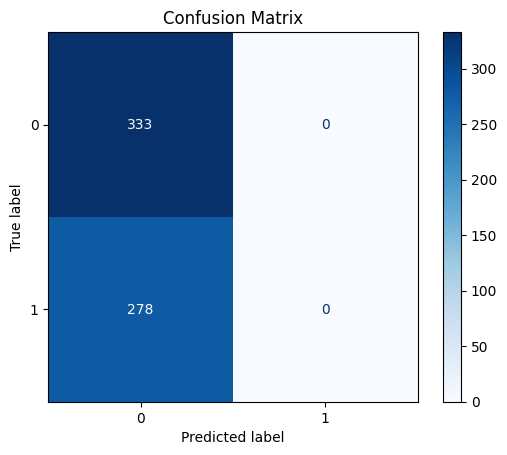

In [38]:
model = models[0]
y_pred = model.predict(X_valid_no_nan)
cm = confusion_matrix(Y_valid_no_nan, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
x_train, x_test, X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

ValueError: ignored